<a href="https://colab.research.google.com/github/sofianbello/TGS-AltText/blob/main/Alt_Text_Machine_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Anleitung</h1>

In diesem __Jupyter-Notebook__ wurde versucht diverse KI-Angebote zu implementieren, um die Erstellung von Alt-Texten automatisieren zu können. __Google Colab__ ist eine webbasierte Entwicklungsumgebung in der __Python-Code__ ausgeführt werden kann, ohne die erforderliche Software auf lokalen Rechnern installieren zu müssen.

Anders als in klassischen Programmen wird der Code nicht vollständig (oder bis zu vordefinierten Breakpoints) ausgeführt, sondern jeder Code-Block muss durch den Klick auf das Symbol (Bild1) individuell gestartet werden.

Startsymbol:


![Bild 01](https://raw.githubusercontent.com/sofianbello/TGS-AltText/main/Colab_01.jpg)


Sobald der Code ausgeführt wurde, wird unterhalb des Code-Blocks das Ergebnis angezeigt (Bild 2)

Beispiel Ausgabe:

![Bild 02](https://raw.githubusercontent.com/sofianbello/TGS-AltText/main/Colab_03.jpg)

Um die Bedienung zu vereinfachen haben wir den Code "versteckt" durch __Code Anzeigen__ kann der Code allerdings angezeigt und modifiziert werden.

![Bild 03](https://raw.githubusercontent.com/sofianbello/TGS-AltText/main/Colab_04.jpg)

<br>



<sub>
Ein Projekt von Lisa Bassalig & Sofian Bello
<br>Betreut durch Prof. Hardy Gundlach & Prof. Ulrich Hoffman
<br>HAW Hamburg 2024
</sub>

In [ ]:
# @title Schritt 1: Installation
# @markdown Dieser Code-Block bereitet die Laufzeitumgebung vor und installiert alle erforderlichen Pakete.

#Import general dependencies

import pathlib
import textwrap
import traceback
import os
import PIL.Image
from contextlib import redirect_stdout
from google.colab import files
from IPython.display import display
from IPython.display import Markdown

# Install Azure dependencies
print('Installing azure dependencies  ... (1/3)')
with open(os.devnull, 'w') as f, redirect_stdout(f):
  !pip install --upgrade azure-cognitiveservices-vision-computervision

# Install Gemini dependencies
print('Installing google dependencies ... (2/3)')
with open(os.devnull, 'w') as f, redirect_stdout(f):
  !pip install -q -U google-generativeai

print('Importing ... (3/3)')
# Azure AI Vision
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
from io import BytesIO


# Google Gemini-Pro API
import google.generativeai as genai

print('Done!\n ')

print('Now importing example images ...')
with open(os.devnull, 'w') as f, redirect_stdout(f):
  !wget -O testImage01.png "https://raw.githubusercontent.com/sofianbello/TGS-AltText/main/Example_01.png"
  image01 = '/content/testImage01.png'
  example01 = '/content/testImage01.png'
print('1/4 loaded...')

with open(os.devnull, 'w') as f, redirect_stdout(f):
  !wget -O testImage02.png "https://raw.githubusercontent.com/sofianbello/TGS-AltText/main/Example_02.png"
  image02 = '/content/testImage02.png'
  example02 = '/content/testImage02.png'
print('2/4 loaded...')

with open(os.devnull, 'w') as f, redirect_stdout(f):
  !wget -O testImage03.png "https://raw.githubusercontent.com/sofianbello/TGS-AltText/main/Example_03.png"
  image03 = '/content/testImage03.png'
  example03 = '/content/testImage03.png'
print('3/4 loaded...')

with open(os.devnull, 'w') as f, redirect_stdout(f):
  !wget -O testImage04.png "https://raw.githubusercontent.com/sofianbello/TGS-AltText/main/Example_04.png"
  image04 = '/content/testImage04.png'
  example04 = '/content/testImage04.png'

print('4/4 images imported!')

Loaded testImage03.png from: /content/testImage03.png 

Using Gemini Pro Vision ... 

Pride Parade in Neu-Delhi. Ein junger Mann mit bunten Streifen auf der Wange 
blickt nach oben. Er trägt einen Ohrring und eine Kette. Im Hintergrund ist ein 
bunter Regenschirm zu sehen. 

 Vorschau:  



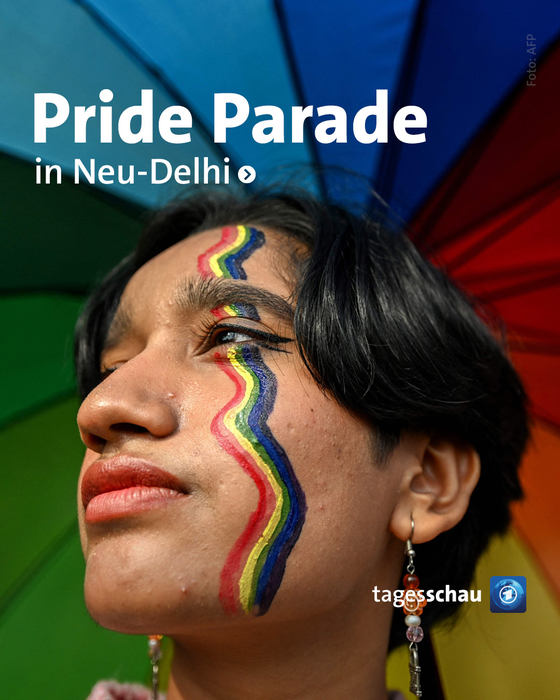

In [8]:
# @title Schritt 2: Ausführung
# @markdown Mit diesem Code-Block kann die API-Anfrage komfortabel modifiziert und versendet werden.

Bild = "Testbild-03" # @param ["Testbild-01", "Testbild-02", "Testbild-03", "Testbild-04", "Upload"]

filename = ""

if Bild == "Testbild-01":
  img_path = example01
  image = PIL.Image.open(img_path)
  filename = os.path.basename(img_path)
  print("Loaded", filename, "from:", img_path, "\n")

elif Bild == "Testbild-02":
  img_path = example02
  image = PIL.Image.open(img_path)
  filename = os.path.basename(img_path)
  print("Loaded", filename, "from:", img_path, "\n")

elif Bild == "Testbild-03":
  img_path = example03
  image = PIL.Image.open(img_path)
  filename = os.path.basename(img_path)
  print("Loaded", filename, "from:", img_path, "\n")

elif Bild == "Testbild-04":
  img_path = example04
  image = PIL.Image.open(img_path)
  filename = os.path.basename(img_path)
  print("Loaded", filename, "from:", img_path,"\n")

else:
  uploaded = files.upload()
  img_path = os.path.join(os.getcwd(), fn)
  image = PIL.Image.open(img_path)
  filename = fn
  print("Loaded", filename, "from:", img_path, "\n")



# Calculate the new size, 25% of the original size
Vorschaugröße = 560 # @param {type:"slider", min:100, max:800, step:10}

with PIL.Image.open(img_path) as img, redirect_stdout(f):

        aspect_ratio = img.height / img.width
        new_height = int(Vorschaugröße * aspect_ratio)

        resized_img = img.resize((Vorschaugröße, new_height), PIL.Image.LANCZOS)


new_width = int(image.width * Vorschaugröße)
new_height = int(image.height * Vorschaugröße)
new_size = (new_width, new_height)
# Resize the image
#resized_image = image.resize(new_size)

# @markdown <br>

# @markdown ##Model wählen:

Engine = "Azure AI Vision" # @param ["Azure AI Vision", "Gemini Pro Vision"]

# @markdown Um die KI-Modelle verwenden zu können, wird ein entsprechender API-Key benötigt.

AZURE_API_KEY ="" # @param {type:"string"}
GEMINI_API_KEY ="" # @param {type:"string"}


if Engine == "Azure AI Vision":
  endpoint = "https://tgs-alttext-dev-collab-01.cognitiveservices.azure.com/"
  key = AZURE_API_KEY
  credentials = CognitiveServicesCredentials(key)
  computervision_client = ComputerVisionClient(endpoint, credentials)
elif Engine == "Gemini Pro Vision":
  model = genai.GenerativeModel('gemini-pro-vision')
  genai.configure(api_key=GEMINI_API_KEY)


# @markdown <br>

# @markdown ##Gemini Pro Einstellungen:
# @markdown ACHTUNG: **Die Google Gemini-Pro-API ist aktuell nicht in Deutschland nutzbar. Um die API testen dennoch testen zu können, empfehlen wir die Nutzung eines VPN-Tunnels. *

Einschließen = "" # @param {type:"string"}
Ausschließen = "" # @param {type:"string"}

Plattform = "Social Media" # @param ["Tagesschau.de", "Social Media"]

test = 'do you know my name?'
test2 = 'My name is frank'

if Plattform == "Tagesschau.de":
  Aufgabe = f"Deine Aufgabe ist es, Alt-Texte für www.tagesschau.de zu erstellen. Die Alt-Texte sollen genau beschreiben, was auf dem Bild zu sehen ist, ohne mit dem Ort zu beginnen. Falls mehrere Bilder (z.B. als Collage oder ähnlichem) zu sehen sind, beschreibe alle Bilder nacheinander. Bei der Erwaehnung von Personen verwende nur deren Vor- und Nachnamen, ohne Titel, Positionen oder Parteizugehoerigkeiten. Ein Alt-Text sollte daher beschreiben, was auf dem jeweiligen Bild zu sehen ist. Dafür reichen in der Regel ein oder zwei Saetze. Beispiele: 'Eine Frau fährt mit ihrem Fahrrad an parkenden Autos vorbei'. Bei Poltiker:innen ist es sinnvoll, sie zu benennen. Beispiel: 'US-Praesident Biden und Chinas Staatschef Xi stehen vor einer Tür und reichen sich die Hand'."
else:
  Aufgabe = f"Deine Aufgabe ist es, Alt-Texte für die Social Media Kanäle der Tagesschau zu erstellen. Falls mehrere Bilder (z.B. als Collage oder ähnlichem) zu sehen sind, beschreibe alle Bilder nacheinander. Bei der Erwaehnung von Personen verwende nur deren Vor- und Nachnamen, ohne Titel, Positionen oder Parteizugehoerigkeiten. Den Alt-Text geben wir für Menschen mit Sehbeeintraechtigung an. Sie sollen auch die Möglichkeit haben, die tagesschau-Inhalte auf unseren verschiedenen Social-Kanaelen barrierefrei zu konsumieren. Ein Alt-Text sollte daher beschreiben, was auf dem jeweiligen Bild zu sehen ist. Dafür reichen in der Regel ein oder zwei Saetze. Beispiel: 'Eine Frau fährt mit ihrem Fahrrad an parkenden Autos vorbei'. Bei Poltiker:innen ist es sinnvoll, sie zu benennen. Beispiel: 'US-Praesident Biden und Chinas Staatschef Xi stehen vor einer Tür und reichen sich die Hand'. Zudem sollte im Alt-Text immer auch stehen, welche Texte und Wörter auf den Bildern geschrieben stehen. Ein Beispiel: Wir schreiben zuerst 'US-Praesident Biden und Chinas Staatschef Xi stehen vor einer Tür und reichen sich die Hand' und machen dann weiter mit 'Im Text steht: (Text)'. Hier reicht es aus, die einzelnen Textebenen mit einem Schrägstrich abzutrennen. Beispiel: 'Im Text steht: UN warnen vor Sandstuermen. / Dramatische Zunahme von Staub- und Sandstuermen drohe insbesondere in Zentralasien.'"

Extras = f" Beachte zudem folgendes: {Einschließen}. Erwähne unter keinen Umständen: {Ausschließen}."


Worte = 2048 # @param {type:"slider", min:0, max:2048, step:1}
Temperatur = 1 # @param {type:"slider", min:0.1, max:1, step:0.1}
top_p = 1 # @param {type:"slider", min:0, max:1, step:0.1}
top_k = 32 # @param {type:"slider", min:1, max:32, step:1}


# @markdown <br>


# @markdown <sub> __Temperatur__: Beeinflusst die Wahrscheinlichkeit mit der das Modell unwahrscheinliche Wörter auswählt </sub>

# @markdown <sub> __top-p__: Das Modell betrachtet die kleinste Gruppe von Wörtern, deren kumulative Wahrscheinlichkeit den Schwellenwert __p__ übersteigt </sub>

# @markdown <sub>  __top-k__: Das Modell betrachtet nur die __k__ wahrscheinlichsten nächsten Wörter bei jedem Schritt der Texterzeugung



def useAzure(image_path):
    print("Using Azure AI Vision ... \n")
    try:
        # Read the image file into a byte array
        with open(image_path, "rb") as image_stream:  # Make sure the variable matches the function argument
            image_data = image_stream.read()

        # Convert the bytes data into a stream
        image_stream = BytesIO(image_data)
        image_stream.seek(0)

        # Call API with the image data
        analysis = computervision_client.analyze_image_in_stream(image_stream, visual_features=["Categories", "Description", "Color"], language='en')

        # Print categories
        if analysis.categories:
            print("\nCategories:")
            for category in analysis.categories:
                print(f" - {category.name} (confidence: {category.score})")

        # Print color information
        if analysis.color:
            print("\nColor Information:")
            print(f" - Dominant color foreground: {analysis.color.dominant_color_foreground}")
            print(f" - Dominant color background: {analysis.color.dominant_color_background}")
            print(f" - Dominant colors: {', '.join(analysis.color.dominant_colors)}")

        # Print description
        if analysis.description.captions:
            print("\nDescriptions:")
            for caption in analysis.description.captions:
                print(f" - {caption.text} \n (confidence: {caption.confidence})")

        else:
          print("No description provided.")

        print("Vorschau: ", "\n")
        display(resized_img)


    except Exception as e:
        print(f"An error occurred: {e}")
        traceback.print_exc()  # This will print the traceback of the exception

def wrap_text(text, line_length):
    words = text.split()
    lines = []
    current_line = ''

    for word in words:
        if len(current_line) + len(word) + 1 <= line_length:
            current_line += word + ' '
        else:
            lines.append(current_line)
            current_line = word + ' '

    lines.append(current_line)  # Add the last line
    return '\n'.join(lines)

def useGemini(prompt, details):
    print("Using Gemini Pro Vision ... \n")

    response = model.generate_content([prompt + details, image],
                                    generation_config=genai.types.GenerationConfig(
                                        candidate_count=1,
                                        stop_sequences=[],
                                        max_output_tokens=Worte,
                                        temperature=Temperatur,
                                        top_p=top_p,
                                        top_k=top_k
                                    ),
                                    stream=True)
    response.resolve()

    wrapped_response = wrap_text(response.text, 80)
    print(wrapped_response)
    #markdown_response = f"Alt-Text: \n\n{response.text}\n"
    #print(markdown_response)
    print("\n", "Vorschau: ", "\n")
    display(resized_img)


# Code to call VertexAI
if Engine == 'Azure AI Vision':
    try:
        useAzure(img_path)
    except Exception as e:
        print(f"An error occurred: {e}")
        traceback.print_exc()
if Engine == 'Gemini Pro Vision':
    try:
      useGemini(Aufgabe, Extras)
    except Exception as e:
      print(f"An error occurred: {e}")
      traceback.print_exc()